In [1]:
!jupyter kernelspec list

Available kernels:
  python3    C:\ProgramData\Anaconda3\share\jupyter\kernels\python3


In [2]:
!pip install plotly
!pip install wordcloud
!pip install textblob

In [3]:
import sys
!{sys.executable} -m spacy download en

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011743 sha256=9b1da7ca80ac2bba440cd234de6796b5d3a47f477c2368824968673d2ae0fe87
  Stored in directory: C:\Users\icha\AppData\Local\Temp\pip-ephem-wheel-cache-wqeg2q7r\wheels\51\19\da\a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
symbolic link created for C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en <<===>> C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[+] Linking successful
C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
!pip install en_core_web_sm-2.2.0.tar.gz

Processing c:\users\icha\en_core_web_sm-2.2.0.tar.gz
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019125 sha256=158b687c8fcc0b6bcaa260c5ac6afc13ba021569321bfb52ca644dac273b508e
  Stored in directory: c:\users\icha\appdata\local\pip\cache\wheels\cd\29\9e\847e5fca19e98d6d92a9da7aba89340ee65368e464564540c2
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [8]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\programdata\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [10]:
# read file
df = pd.read_csv("Dirumahaja_Done_New.csv")

In [11]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['Text'],inplace =True)

In [12]:
df.head()

,User,Text,Retweets,Favorites,HashTags,City,date,time
0,sumberofficial,Moment #stayathome sekarang ini bisa jadi mome...,0,0,#stayathome #stayathome #dirumahaja #dirumahaja,Surabaya,2020-05-10,08-54-43
1,frankensgen,"Harga hanya Rp. 55.000,00 Anda sudah bisa mend...",0,0,#freemasker #dirumahaja #dirumahaja #eskopisus...,Bandung,2020-05-05,07-48-14
2,hansedbert97,Apakah pembangunan Tanjung ann paradise resort...,0,0,#lebaran2020 #lebaran #lebaran #idulfitri #idu...,Tangerang,2020-05-24,13-43-35
3,RamadhanaRey,"Tangan kanan memberi, tangan kiri instastory. ...",0,0,#dirumahaja #dirumahaja,Jakarta,2020-05-05,07-03-37
4,SINDOnews,"Menjaga keuangan selama pandemi Covid 19, Apa ...",0,0,#dirumahaja #dirumahaja #ojomudik #LawanCovid19,Jakarta,2020-05-07,21-51-16


In [13]:
print('shape:', df.shape)
print('number of tweets:', df['Text'].nunique())
print('number of users:', df['User'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (1300, 8)
number of tweets: 1300
number of users: 887
range: 2020-05-03 , 2020-06-02
dates: 31


In [14]:
# get information about the number of missing values and their percentage
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
HashTags,214,16.5


Text(0.5, 1.0, 'Number of Tweets per day')

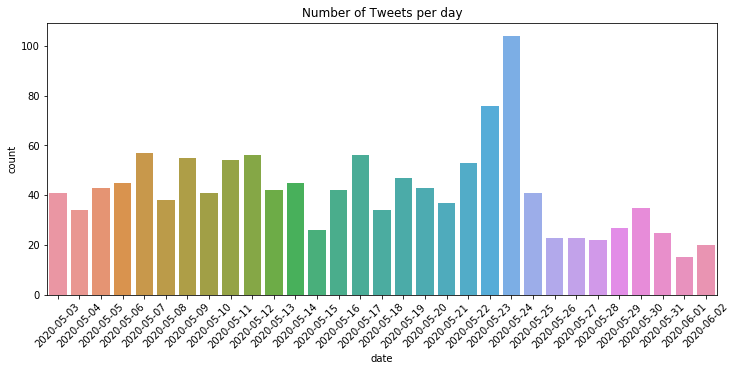

In [15]:
# plot number of tweets everyday
fig = plt.figure(figsize = (12,5))
chart = sns.countplot(df['date'], order = sorted(df['date'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('Number of Tweets per day')

In [16]:
# dates = sorted(df['date'].unique())
# fig= plt.figure(figsize=(12,4))
# chart = sns.countplot(df.groupby(['User'])['date'].min(), order = dates)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# chart.set_title('Number of Users per day')

Text(0.5, 1.0, 'Number of Tweets in Different Cities Groups across Dates')

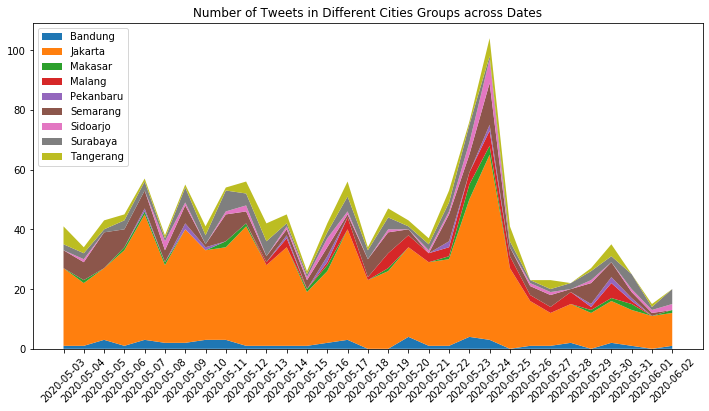

In [17]:
# plot number of tweets everyday in each city 
pivot = pd.pivot_table(df, index=['City'],
                         columns=['date'],
                         values=['Text'], 
                         aggfunc = lambda x: len(x), 
                         fill_value=0)

fig= plt.figure(figsize = (12,6))
plt.stackplot(sorted(df['date'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['date'].unique()))
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.title('Number of Tweets in Different Cities Groups across Dates')

In [18]:
# extract data that doesn't contain NAs only
df = df[df['HashTags'].notna()]

In [19]:
df = df[df['date']>'2020-05-04']

In [20]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [21]:
# apply all the preprocess functions
df['text_nlp'] = preprocess(df.Text)
df['text_nlp'] = df['text_nlp'].apply(remove_urls)
df['text_nlp'] = df['text_nlp'].apply(removes)

In [22]:
df.Text[0]

'Moment #stayathome sekarang ini bisa jadi moment berharga buat kalian untuk belajar berbicara di depan kamera.. #dirumahaja perlu ini nih camcorder yang berkualitas SUPER tapi harga BERSAHABAT.. . . Panasonic… https://www.instagram.com/p/CAAFobNlqMx/?igshid=g6c4un3be2gw'

In [23]:
df.text_nlp[0]

'Moment  sekarang ini bisa jadi moment berharga buat kalian untuk belajar berbicara di depan kamera..  perlu ini nih camcorder yang berkualitas SUPER tapi harga BERSAHABAT.. . . Panasonic… '

In [24]:
# Get the lenghth of text and word count
df['text_len'] = df.text_nlp.astype(str).apply(len)
df['word_count'] = df.text_nlp.apply(lambda x: len(str(x).split()))

In [25]:
# fig= plt.figure(figsize = (12,5))
# sns.countplot(df['word_count'])

In [26]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"j\'gn", " jangan", phrase)   
    phrase = re.sub(r"t\'dk", " tidak", phrase)
    phrase = re.sub(r"\'dm", " direct message", phrase)
    phrase = re.sub(r"\'rmh", " rumah", phrase)
    phrase = re.sub(r"\'ktr", " kantor", phrase)
    phrase = re.sub(r"\'jln", " jalan", phrase)
    phrase = re.sub(r"\'sy", " saya", phrase)
    phrase = re.sub(r"a\'ja", " saja", phrase)
    phrase = re.sub(r"\'jl", " jalan", phrase)
    return phrase

# decontracte words
df.text_nlp = df.text_nlp.apply(lambda x: decontracted(x).lower())

In [27]:
# remove stop words
stop_words = stopwords.words('indonesian')
not_stopwords = {}
common_words =['yang','twitter','untuk',
               'pada','akan','ingin','dapat','boleh','harus', 
             
               'lagi','maka','serta','masih','tanpa','agak','boleh','toh','iya','anu','agar','hal','ini']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.text_nlp = df.text_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [28]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.text_nlp = df.text_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.text_nlp = df.text_nlp.apply(lambda x: rm_space.sub(' ', x))

In [29]:
df.text_nlp[5]

'melaksanakan kegiatan pengangkutan sampah 10 kendaraan 1505 t kel cakung timur minggu 10 mei 2020 aniesbaswedan herwansyah yogiikhwan mumuhmulyana4 dinaslhdki sudinlhtimur'

In [30]:
DiRumahAja = df

In [31]:
# get the polarity of each text
df['polarity'] = df.text_nlp.map(lambda text: TextBlob(text).sentiment.polarity)

# classify sentiment into positive and negative ones
df['sentiment'] = ''
df['sentiment'][df['polarity'] > 0] = 'positive'
df['sentiment'][df['polarity'] == 0] = 'neutral'
df['sentiment'][df['polarity'] < 0] = 'negative'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0, 600)

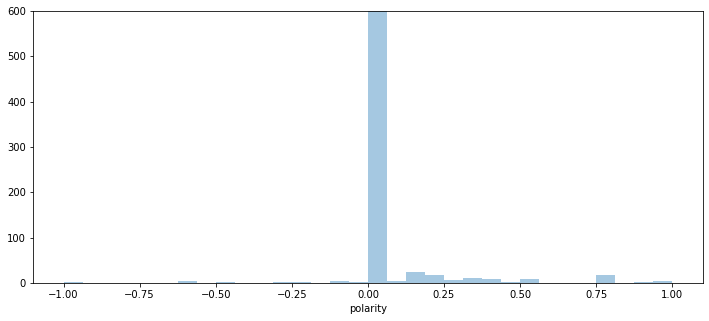

In [32]:
fig = plt.figure(figsize=(12,5))
sns.distplot(df['polarity'],kde = False)
plt.ylim(0, 600)

In [33]:
df[df['polarity']<-0.4]

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,word_count,polarity,sentiment
161,103popfmjakarta,"Hey, Movie Freaks..... Yang lagi #dirumahaja d...",0,0,#dirumahaja #dirumahaja,Jakarta,2020-05-12,04-36-01,hey movie freaks ramadhan biar ga boring mendi...,204,36,-1.0,negative
201,adhityaji,Ga kerasa dah 2 bulan lebih cuti gym..gantinya...,0,0,#workoutathome #gymathom #dirumahaja #dirumaha...,Semarang,2020-05-11,10-08-54,ga kerasa dah 2 cuti gym gantinya workout from...,162,29,-0.5,negative
339,kokokuliner,Buat makan malam #DiRumahAja kali ini gw punya...,0,0,#DiRumahAja #DiRumahAja,Jakarta,2020-05-17,11-41-47,makan malam kali gw ayam taliwang honey bbq ch...,200,35,-0.6,negative
365,alinaluth,Apa barang ter absurd yang kalian beli online ...,0,0,#dirumahaja #dirumahaja,Jakarta,2020-05-11,03-43-51,barang ter absurd beli online me catokan porta...,160,25,-0.5,negative
396,wgpropertyID,⠀ Tetap tenang jangan panik dan tetap rebahan ...,0,0,#dirumahaja #dirumahaja #makandirumah,Semarang,2020-05-31,08-45-02,tenang panik rebahan ya aja biar masak menu p...,194,33,-0.6,negative
397,BowoSusilo98,"Menu buka puasa, spesial dari @CupbopIndonesia...",3,3,#MakanBersamaCupbop #dirumahaja #dirumahaja,Jakarta,2020-05-13,14-44-52,menu buka puasa spesial cupbopindonesia pesan ...,242,39,-0.6,negative
508,Eltujuh_Bekasi,Beli STICKER CUSTOM HOLOGRAM NAMA CUTTING STIK...,0,0,#dirumahaja #dirumahaja,Jakarta,2020-05-29,01-49-09,beli sticker custom hologram nama cutting stik...,237,33,-0.6,negative
1163,DinsihCakung,"kegiatan pengangkutan sampah bak chicken, arma...",0,0,#DinasLHDKI #PSBBJakarta #YukPakaiMasker #Diru...,Jakarta,2020-05-08,09-40-00,kegiatan pengangkutan sampah bak chicken armad...,190,21,-0.6,negative


In [34]:
# Sentiment 
df.groupby('sentiment').Text.count()

sentiment
negative     16
neutral     904
positive    106
Name: Text, dtype: int64

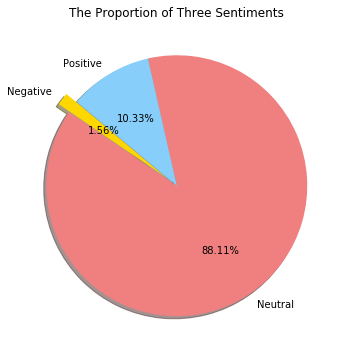

In [35]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('sentiment').Text.count().values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

Text(0.5, 1.0, 'Average sentiment of Tweets across Dates')

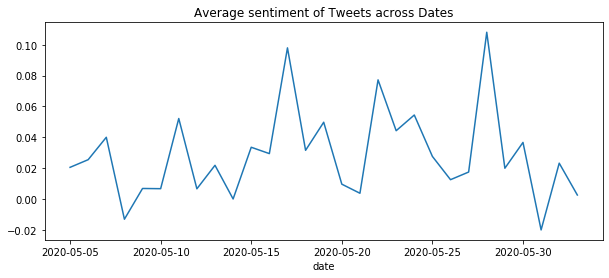

In [36]:
# plot sentiment fluctuation with date
fig, ax1 = plt.subplots(figsize=(10,4))
df.groupby(['date']).mean()['polarity'].plot(kind = 'line')
plt.title('Average sentiment of Tweets across Dates')

In [37]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['text_nlp']))): 
    for word in df['text_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|███████████████████████████████████████████████████████████████████████████| 1026/1026 [00:00<00:00, 24715.17it/s]


In [38]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
mask = np.array(Image.open(path.join(d,'twitter.png')).convert("RGB"))
color = np.array(Image.open(path.join(d,'twitter.png')).convert("RGB"))

def func(arr):   
    if(arr[2]==0):
        return np.array([255,255,255],dtype="uint8")
    else:
        return arr

mask=np.apply_along_axis(func, 2, mask)
color=np.apply_along_axis(func, 2, color)

In [39]:
red = np.array(Image.open(path.join(d,'twitter.png')).convert("RGB"))
red=np.apply_along_axis(func, 2, red)

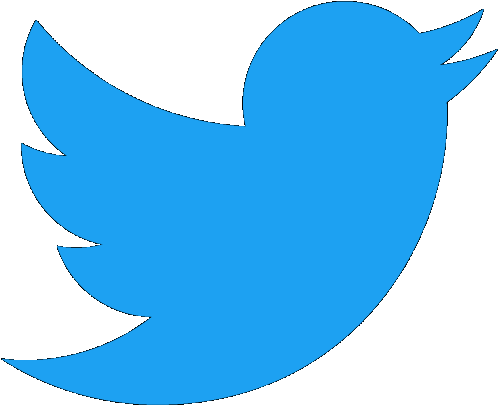

In [40]:
Image.fromarray(mask,"RGB")

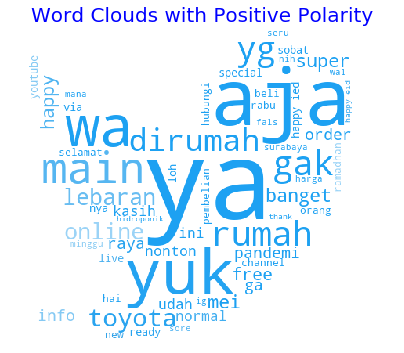

In [41]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'positive'])))
    # declare our figure  
image_colors = ImageColorGenerator(color)
plt.figure(figsize=(7,6))
# plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#DE2929')
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='#0000ff')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [42]:
wordcloud.to_file('positive_detail.png')

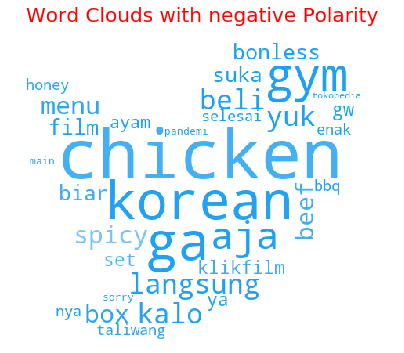

In [43]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=num_words, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white', stopwords=set(STOPWORDS),mask = mask)
wordcloud.generate(str(set(df['text_nlp'][df['sentiment'] == 'negative'])))
    # declare our figure  
image_colors = ImageColorGenerator(red)
plt.figure(figsize=(7,6))
# plt.title("Word Clouds with negative Polarity", fontsize=20,color='#DE2929')
plt.title("Word Clouds with negative Polarity", fontsize=20,color='#ff0000')
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='None')
plt.axis('off')
plt.show()

In [44]:
wordcloud.to_file('negative_detail.png')

In [45]:
add_stopwords = ['dirumahaja','hari','membuat','memikirkan','mengetahui',
 'sesuatu', '1','3','4','5','2','membuat','berfikir','menginginkan', 'menjalankan',
'melihat','tetap', 'melalui', 'sekarang', 'banyak', 'ketika', 'metika',
 'semua','sungguh','sesuatu', 'setiap','sekitar','sini','dibuat',
 'pastinya','bagian','total', 'sedikit','mendapatkan',
 'terakhir', 'panjang', 'selain', 'melihat', 'selanjutnya','disana',
 'orang','waktu','baru','terimaksih', 'bagus','berjalan','tahu',
 'seminggu','semuanya','langsung','cinta','benar','rumah','kita','tinggal',
'tolong', 'kerja', 'hidup']

# Add meaningless words into stopwords
for i in range(len(add_stopwords)):
    STOPWORDS.add(add_stopwords[i])

In [46]:
# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['text_nlp']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('indonesian')
# 'home', 'stay','new','york', 'time',
newStopWords =  ['2', '3', '1', 
                 'sesuatu', 'saya', 'kita', 'mendapatkan', 'kamu', 'membiarkan', 'berjalan', 'tahu', 
                'membuat', 'mengambil', 'tetap','mendapatkan', 'bisa', 'ini', 'semua', 'pergi',
                'ketika', 'disini', 'baik', 'banyak', 'menginginkan', 'setiap', 'sedikit']
# stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [47]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [49]:
start=24
limit=32
step=2
random = 155

In [50]:
texts

[['moment', 'super'],
 ['masker', 'gofood', 'grabfood', 'order', 'pengiriman'],
 ['tanjung', 'era', 'jokowi'],
 [],
 [],
 [],
 [],
 ['brownie'],
 ['point'],
 ['order', 'gofood', 'loh'],
 ['good', 'morning', 'open', 'price', 'dage', 'dage', 'semur'],
 ['fal'],
 [],
 ['pagi', 'alarm'],
 [],
 [],
 ['olahraga', 'pengen', 'singset'],
 ['masak'],
 ['call'],
 ['mend'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['grateful'],
 [],
 ['himbauan', 'dibejaan'],
 ['dehhh', 'wkwk'],
 [],
 [],
 ['film', 'knife'],
 [],
 ['stream', 'official', 'jam', 'stay', 'tune'],
 ['kasih', 'driver'],
 ['volume'],
 ['update', 'sembuh', 'jaga', 'family', 'doctor'],
 ['virtual', 'experience', 'episode', 'spesial'],
 [],
 [],
 [],
 [],
 ['dijual', 'datsun', 'go', 'short', 'manual', 'call'],
 [],
 [],
 [],
 ['update', 'pc', 'laptop'],
 [],
 [],
 [],
 [],
 ['disertai', 'kasih'],
 ['independent'],
 [],
 ['loh', 'gabung'],
 [],
 [],
 [],
 [],
 [],
 ['good', 'gading', 'hospital'],
 [],
 ['sehat'],
 ['boxie', 'mall', 'boxie'],
 ['

In [51]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [52]:
# compute coherence values for each model
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:\\Users\\icha\\mallet-2.0.8'

mallet_path = 'mallet-2.0.8\\bin\\mallet' # update this path
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

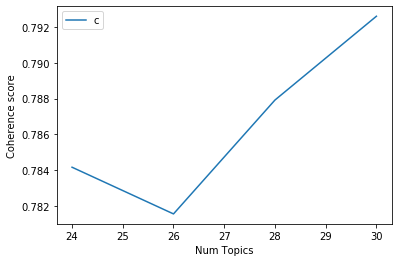

In [53]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [54]:
# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 24  has Coherence Value of 0.7842
Num Topics = 26  has Coherence Value of 0.7816
Num Topics = 28  has Coherence Value of 0.7879
Num Topics = 30  has Coherence Value of 0.7926


In [55]:
mallet_path = 'mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=30, 
                                             id2word=id2word,
                                             random_seed = 155)

In [56]:
# Show Topics
model_topics = ldamallet.show_topics(formatted=False)
pprint(sorted(ldamallet.print_topics(num_words=8)))

[(0,
  '0.097*"mend" + 0.065*"pendampe" + 0.032*"marketing" + 0.032*"line" + '
  '0.032*"idul" + 0.032*"ongoing" + 0.032*"credit" + 0.032*"call"'),
 (1,
  '0.229*"video" + 0.143*"order" + 0.057*"info" + 0.029*"pre" + 0.029*"lomba" '
  '+ 0.029*"film" + 0.029*"drama" + 0.029*"recommend"'),
 (2,
  '0.078*"berbagi" + 0.059*"stay" + 0.059*"open" + 0.059*"masak" + '
  '0.059*"ekonomi" + 0.039*"disc" + 0.039*"ride" + 0.039*"mistake"'),
 (3,
  '0.116*"pintu" + 0.070*"special" + 0.047*"abi" + 0.047*"normal" + '
  '0.047*"dirumahaja" + 0.023*"kemana²" + 0.023*"provinsi" + 0.023*"ml"'),
 (4,
  '0.267*"family" + 0.089*"jaga" + 0.089*"doctor" + 0.044*"point" + '
  '0.044*"order" + 0.044*"loh" + 0.022*"depok" + 0.022*"alfaromeo"'),
 (5,
  '0.163*"sore" + 0.047*"stream" + 0.047*"teh" + 0.047*"boxie" + '
  '0.047*"tiramisu" + 0.023*"kupe" + 0.023*"air" + 0.023*"knife"'),
 (7,
  '0.167*"order" + 0.167*"loh" + 0.048*"update" + 0.048*"live" + '
  '0.024*"collaboration" + 0.024*"sembuh" + 0.024*"lusa" + 

In [57]:
topics = pd.DataFrame(sorted(ldamallet.print_topics(num_words=10)))
topics.columns = ['Topic_num','Key_words']
topics.to_csv('30_topics_2.csv',index = False)

In [58]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.7926024007547591


In [59]:
topic_names = ['promo/giladiskon/infopromo', 
               'lawancovid19/social', 
               'contact/family/yukpakaimasker', 
               'bioskopkeren/layarkaca', 
               'stay/didalam/area', 
               'single/happiness', 
               'seafood/kesehatan', 
               'kesehatan/dampak', 
               'cegahcorona/belajardarirumah/dampak/product', 
               'kejadian/real/pertikaian/tanggung', 
               'twitter/repost/terbaru/love', 
               'normal/hujan/bandung', 
               'protokol/efektif/pemandangan', 
               'disuruh/masker/check', 
               'home/kesehatan/kementrian', 
               'niat/akhlak', 
               'maen/stream/wa', 
               'dampak/mental/kesehatan', 
               'home/area/order/ongkir', 
               'share/dikaji/online', 
               'berdoa/udah/salurkan', 
               'menggelar/spesial/sore/ride', 
               'dikarenakan/efek/psbb', 
               'kerjadirumahaja/bersatulawancorona/jagajarak', 
               'unicef/tetapgunakanmasker/jagakebersihan', 
               'check/dalan/polsek/masker', 
               'bersamakitabisa/negaramelindungi/indonesianway', 
               'twitterreceh/semangat/yangterdalam', 
               'photo/newnormal/safe', 
               'sale/online']

In [60]:
topics_docs = []
for m in ldamallet[corpus]:
    topics_docs.append(m)

train_vecs = []
for i in topics_docs:
    topic_vec = [j[1] for j in i]
    train_vecs.append(topic_vec) 

topic_dis = pd.DataFrame(train_vecs,columns=topic_names)
topic_dis.head()

df= pd.concat([df,topic_dis],axis = 1)
df.head(2)

,User,Text,Retweets,Favorites,HashTags,City,date,time,text_nlp,text_len,...,berdoa/udah/salurkan,menggelar/spesial/sore/ride,dikarenakan/efek/psbb,kerjadirumahaja/bersatulawancorona/jagajarak,unicef/tetapgunakanmasker/jagakebersihan,check/dalan/polsek/masker,bersamakitabisa/negaramelindungi/indonesianway,twitterreceh/semangat/yangterdalam,photo/newnormal/safe,sale/online
0,sumberofficial,Moment #stayathome sekarang ini bisa jadi mome...,0.0,0.0,#stayathome #stayathome #dirumahaja #dirumahaja,Surabaya,2020-05-10,08-54-43,moment moment berharga belajar berbicara kamer...,188.0,...,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051
1,frankensgen,"Harga hanya Rp. 55.000,00 Anda sudah bisa mend...",0.0,0.0,#freemasker #dirumahaja #dirumahaja #eskopisus...,Bandung,2020-05-05,07-48-14,harga rp 55 000 00 free 1masker pesan gofood g...,190.0,...,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.030303,0.040404,0.032323


In [61]:
# Creat all the interested word for analysis
Interesting_words = ['tv','membaca','video','game','minum','puzzle','pantai','makan','jalan-jalan', 
                    'tiktok','musik','spotify','bicara','gym','latihan','telepon','zoom', 
                      'ngobrol','youtube','netflix','nonton','episode','tantangan','challenge', 
                      'mendengarkan','lagu','taman', 
                      'tidur','bigo','instagram','instagram','virtual', 
                      'makan siang','makan pagi','makan malam','masak','bekerja',
                      'social','teman','keluarga','anak','delivery','layanan', 'drakor']

In [62]:
for col in Interesting_words:
    df[col]=df.text_nlp.apply(lambda x: int(col in str(x)))

In [63]:
# get all the cities
city = list(df['City'].unique())

In [64]:
city.remove(np.nan)

In [65]:
# create city vector
for col in city:
    DiRumahAja[col]=DiRumahAja.apply(lambda x: int(str(x) == col))
DiRumahAja = DiRumahAja.drop('Bandung',1)
DiRumahAja = DiRumahAja.dropna()

In [66]:
# create polarity score and subjectivity score
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

DiRumahAja['Text'] = DiRumahAja['Text'].apply(str)
DiRumahAja['polarity'] = DiRumahAja['Text'].apply(pol)
DiRumahAja['subjectivity'] = DiRumahAja['Text'].apply(sub)

In [69]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [70]:
X = DiRumahAja.drop(['User', 'Text', 'Retweets', 'Favorites', 'HashTags','date','City',
       'time', 'text_nlp', 'text_len', 'word_count','polarity','subjectivity', 'sentiment'], 1)
Y = DiRumahAja['polarity']

In [93]:
# train test split
#HARUSNYA langsung INI GUYS TAPI ERROR MULU -> X_test,X_train,y_test,y_train=train_test_split(X,Y, test_size=0.3, random_state=31)

#TRY X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
#TRY ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)

import numpy as np
from sklearn.model_selection import ShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
Y = np.array([1, 2, 1, 2, 1, 2])
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


In [94]:
# train test split
X_test,X_train,y_test,y_train=train_test_split(X,Y, test_size=0.3, random_state=31)

In [115]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [119]:
# run lassocv
lasso = LassoCV(cv=2, random_state=31)
lasso.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


LassoCV(cv=2, random_state=31)

In [120]:
# predict y
Y_pred = lasso.predict(X_test)
Y_pred

array([1.5, 1.5, 1.5, 1.5])

In [187]:
#format length harusnya biar ga 0.0

# performance
train_score=("\nTraining set score: {:.2f}".format(lasso.score(X_train, y_train)))
test_score=("\nTest set score    : {:.2f}".format(lasso.score(X_test, y_test)))


#train_score=lasso.score(X_train,y_train)
#test_score=lasso.score(X_test,y_test)
print(train_score)
print(test_score)


Training set score: 0.00

Test set score    : 0.00


In [172]:
#aneh banget error tapi di lanjut bisa

# create a dictionary with feature and coeficient
coef_dict = dict(zip(list(X[0]),list(list(lasso.coef_))))
# rank feature by coeficient value
import operator
sorted_importance = sorted(coef_dict.items(), key=operator.itemgetter(1))
sorted_importance

[(1, 0.0), (2, 0.0)]

In [158]:
df.columns[13:43]
df.iloc[:,13:43].mean().values

array([0.03322088, 0.03324646, 0.03338648, 0.03334666, 0.03337718,
       0.03331554, 0.03332723, 0.03326952, 0.03319892, 0.03355387,
       0.03336836, 0.03323615, 0.03326445, 0.03327816, 0.03329153,
       0.03345042, 0.0333488 , 0.03329486, 0.03325484, 0.03399495,
       0.03324768, 0.03323941, 0.03329081, 0.03329699, 0.03342838,
       0.03336376, 0.03326362, 0.03325053, 0.03329556, 0.03329801])

In [163]:
topic_list = df.columns[13:43]
topic_mean = df.iloc[:,13:43].mean().values

for i in range(len(topic_list)):
    df[i] = np.where(df[topic_list[i]] > 0.03,1,0)
    
topic_polarity = list()
for i in range(30):
    topic_polarity.append(df[df[i]==1]['polarity'].mean())
    
topic_polarity = pd.DataFrame({'Topics':topic_list,'Polarity':topic_polarity})
topic_polarity.sort_values(by = ['Polarity'],ascending=False)

,Topics,Polarity
9,kejadian/real/pertikaian/tanggung,0.033114
18,home/area/order/ongkir,0.032988
26,bersamakitabisa/negaramelindungi/indonesianway,0.032943
6,seafood/kesehatan,0.032904
19,share/dikaji/online,0.032904
25,check/dalan/polsek/masker,0.032862
3,bioskopkeren/layarkaca,0.032859
4,stay/didalam/area,0.032859
17,dampak/mental/kesehatan,0.032859
23,kerjadirumahaja/bersatulawancorona/jagajarak,0.032817


In [164]:
# count how much time each topic is discussed in each city
topic_cities = df.groupby(['City']).sum().iloc[:,-30:].transpose()
topic_cities

City,Bandung,Jakarta,Makasar,Malang,Pekanbaru,Semarang,Sidoarjo,Surabaya,Tangerang
0,35,495,13,25,8,93,24,50,47
1,34,498,13,25,8,92,24,50,47
2,34,493,13,25,8,93,24,50,46
3,33,493,12,25,8,92,24,50,47
4,33,492,13,25,8,92,24,50,47
5,34,494,12,25,8,92,24,51,47
6,33,497,12,25,8,92,24,51,47
7,34,495,13,25,8,92,24,51,46
8,34,493,13,25,8,93,24,51,47
9,33,492,13,25,8,92,24,50,47


In [165]:
df = df.dropna(subset = ['text_nlp'])

In [166]:
specail_words = ['video','bioskopkeren','streaming','episode','drakor',
                 'promo','masker','workout','layarkaca','kesehatan',
                 'dampak','cegahcorona','twitter',
                 'repost',
                 'prayer',
                 'reading','book',
                 'game',
                 'instagram',
                 'phone','zoom','virtual','message',
                 'eat','masak','kejadian','real','niat',
                 'akhlak','gofood','grabfood','efektif',
                 'mental',
                 'dikaji','share']
avg_polarity = list()
num_texts = list()
for word in specail_words:
    avg_polarity.append(df[df['text_nlp'].str.match(word)]['polarity'].mean())
    num_texts.append(len(df[df['text_nlp'].str.match(word)]))

In [167]:
activity = pd.DataFrame()
activity['activity'] = specail_words
activity['avg_polarity'] = avg_polarity
activity['num_texts'] = num_texts
activity= activity.sort_values(by = ['num_texts'],ascending = True)
activity.reset_index(inplace = True)
activity.drop('index',axis = 1,inplace = True)

In [168]:
# activity['avg_polarity']
activity

,activity,avg_polarity,num_texts
0,video,NaN,0
1,mental,NaN,0
2,efektif,NaN,0
3,grabfood,NaN,0
4,gofood,NaN,0
5,akhlak,NaN,0
6,real,NaN,0
7,kejadian,NaN,0
8,eat,NaN,0
9,message,NaN,0


In [169]:
positive = activity[activity['avg_polarity']>0.01].index
mild = activity[(activity['avg_polarity']>=0) &(activity['avg_polarity']<=0.01)].index

Text(0.5, 1.0, 'The average polarity of all Tweets containing a keyword')

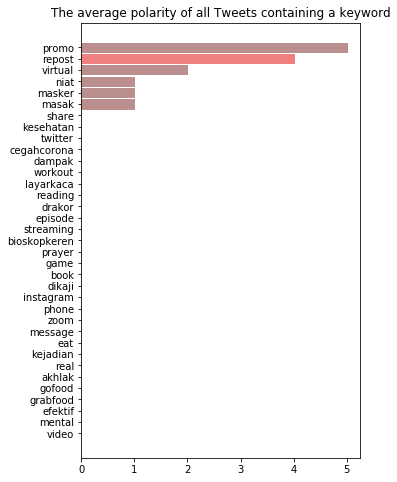

In [170]:
fig, ax = plt.subplots(figsize=(5,8))
barlist =plt.barh(range(len(activity['num_texts'])), activity['num_texts'],color = 'grey')
ax.set_yticks(range(len(activity['num_texts'])))
ax.set_yticklabels(activity['activity'])
plt.rc('xtick', labelsize=10) 
for word in positive:
    barlist[word].set_color('lightcoral')
for word in mild:
    barlist[word].set_color('rosybrown')
plt.title('The average polarity of all Tweets containing a keyword')